In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
xsl = pd.ExcelFile('http://www.who.int/entity/phe/health_topics/outdoorair/databases/WHO_AAP_database_May2016_v3web.xlsx?ua=1')
data = xsl.parse('database',header = 2)

In [3]:
data1 = data[['Country','Annual mean, ug/m3.1','Year.1']]
data1 = data1[data1['Year.1'] == 2013]
#,'Annual mean, ug/m3.1','Year.1'
Country = data1.Country.drop_duplicates()

In [4]:
avepm = []
for i in Country:
    datatemp = data1[data1.Country == i]
    avepm.append(np.average(datatemp['Annual mean, ug/m3.1']))

averagepm = np.average(avepm)
data2 = pd.DataFrame([np.array(Country),np.array(avepm)]).T
data2.sort_values(by = 1, axis = 0, ascending=False, inplace = True)
data2 = data2.replace('United Arab Emirates', 'UAE')
data2 = data2.replace('The former Yugoslav Republic of Macedonia', 'TFYRM')
data2 = data2.replace('Bolivia, Plurinational States of', 'Bolivia')

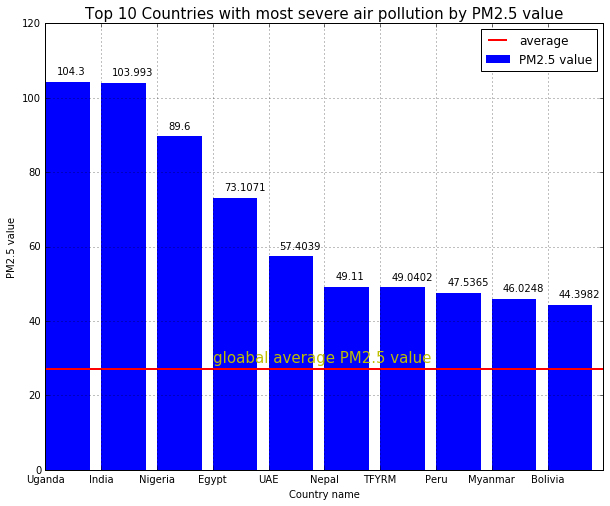

In [5]:
figure = plt.figure(figsize = (10,8))
#plt.subplot(1,2,1)
plt.bar(np.arange(0,10), data2.iloc[:10,1], width = 0.8, 
        lw = 0, tick_label = data2.iloc[:10,0],label = 'PM2.5 value' )
plt.plot((0, 10),(averagepm, averagepm), lw = 2, c = 'r', label = 'average')
plt.ticklabel_format(UseOffset = True, fontsize = 0.01)
plt.grid()
plt.legend()
plt.xlabel('Country name',fontsize = 10)
plt.ylabel('PM2.5 value',fontsize = 10)
plt.title('Top 10 Countries with most severe air pollution by PM2.5 value',fontsize = 15)
for i in range(0,10):
    plt.text(i+0.2 ,data2.iloc[i,1]+2, data2.iloc[i,1].astype(float32))
plt.text(3,averagepm+2, 'gloabal average PM2.5 value', color = 'y', fontsize = 15)